In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import math
import statsmodels.api as sm

import heapq
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize, LabelEncoder
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

import statsmodels.tsa.stattools as smt
from statsmodels.tsa.stattools import grangercausalitytests

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [42]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [43]:
r2_data = pd.read_csv("../../manual/cleaned_r2.csv")
r2_data.rename(columns={r2_data.columns[0]: 'timestamp'}, inplace=True)
r2_data['day'] = 2
r2_data['ORCHIDS'] = (r2_data['bidPrice'] + r2_data['askPrice']) / 2
r2_data['timestamp'] *= 100
r2_data

,timestamp,bidPrice,askPrice,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,day,ORCHIDS
0,0,1055.0,1057.0,1.0,8.0,-2.0,1100.0000,75.000000,2,1056.00
1,100,1054.0,1055.5,1.0,8.0,-2.0,1100.8351,75.024070,2,1054.75
2,200,1054.0,1055.5,1.0,8.0,-2.0,1101.6697,75.048004,2,1054.75
3,300,1054.5,1056.0,1.0,8.0,-2.0,1102.5039,75.071810,2,1055.25
4,400,1055.5,1057.0,1.0,8.0,-2.0,1103.3376,75.095474,2,1056.25
...,...,...,...,...,...,...,...,...,...,...
9995,999500,1051.0,1053.0,0.8,8.0,-4.0,2597.2483,69.917725,2,1052.00
9996,999600,1050.5,1051.5,0.8,8.0,-4.0,2597.7950,69.934050,2,1051.00
9997,999700,1051.0,1052.5,0.8,8.0,-4.0,2598.3435,69.950450,2,1051.75
9998,999800,1052.0,1053.0,0.8,8.0,-4.0,2598.8938,69.966900,2,1052.50


In [83]:
r3_data = pd.read_csv("../../logs/round3_results.csv")
r3_data = r3_data[r3_data['product'].isin(['SUNLIGHT', 'HUMIDITY'])].copy()
r3_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss


In [44]:
prices_neg1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1, r2_data], ignore_index=True)
orchids = orchids.drop(columns=['bidPrice', 'askPrice'])
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids.loc[30003:, 'new_timestamp'] += 1000100
orchids.iloc[0:30005]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.00000,3000200
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.00000,3000300


In [45]:
def weighted_moving_average(series, window):
    """
    Calculate the Weighted Moving Average (WMA) for a given series with a specified window size.
    """
    # Weights increase linearly from 1 to 'window' and then normalize them
    weights = np.arange(1, window + 1) / window
    return series.rolling(window=window, min_periods=1).apply(lambda x: np.dot(x, weights[-len(x):]) / np.sum(weights[-len(x):]), raw=True)

def hull_moving_average(series, window):
    """
    Calculate the Hull Moving Average (HMA) using Weighted Moving Average (WMA).
    """
    # Calculate the WMA for half the window length and double it
    half_window_wma = weighted_moving_average(series, window // 2) * 2

    # Calculate the WMA for the full window length
    full_window_wma = weighted_moving_average(series, window)

    # Calculate the difference between the two WMA series
    diff_wma = half_window_wma - full_window_wma

    # Calculate the square root of the window length
    sqrt_window = int(np.sqrt(window))

    # Calculate the WMA of the difference with a period of the square root of the window length
    hma = weighted_moving_average(diff_wma, sqrt_window)

    return hma

def exp_hull_moving_average(series, window):
    """
    Calculate the Hull Moving Average (HMA) using the Exponential Moving Average (EMA),
    ensuring calculations start from the first available data point.
    
    Parameters:
    series (pandas.Series): The time series data.
    window (int): The window size for the HMA calculation.
    
    Returns:
    pandas.Series: The HMA values as a new time series.
    """
    # Calculate the EMA for half the window length, starting calculations from the first data point
    half_length_ema = series.ewm(span=window // 2, adjust=False, min_periods=1).mean()

    # Calculate the EMA for the full window length, also starting from the first data point
    full_length_ema = series.ewm(span=window, adjust=False, min_periods=1).mean()

    # Calculate the difference between the two EMA series (2*half_length EMA - full_length EMA)
    diff_ema = 2 * half_length_ema - full_length_ema

    # Calculate the square root of the window length
    sqrt_window = int(np.sqrt(window))

    # Calculate the EMA of the difference with a period of the square root of the window length, starting from the first data point
    hma = diff_ema.ewm(span=sqrt_window, adjust=False, min_periods=1).mean()

    return hma

In [46]:
roll = 400
lag = 475 # 475? 483?
threshold = 10

# Potential Sunlight Indicators

orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) / 100 # overpowers SUNLIGHT sometimes
orchids['alt_sun_low'] = np.where(orchids['SUNLIGHT'] < 2500, orchids['SUNLIGHT'], 0) / 100 

orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 10000 # no
orchids['alt_remain_sun'] = (25*7/12 - np.minimum(orchids['alt_cum_sun'], 25*7/12)) * 12 / 7 # yes
orchids['alter_cum_sun'] = 25 - orchids['alt_remain_sun']
orchids['sun_scale'] = orchids['SUNLIGHT'] / 100

orchids['sun_diff'] = orchids.groupby('day')['SUNLIGHT'].diff() # yes
orchids['alt_sun_diff'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['sun_diff'], 0)
orchids['alt_sun_diff_low'] = np.where(orchids['SUNLIGHT'] < 2500, orchids['sun_diff'], 0)
orchids['alter_sun'] = np.maximum(orchids['SUNLIGHT']/100 - 25, 0)
orchids['alter_sun_low'] = np.maximum(25 - orchids['SUNLIGHT']/100, 0)
orchids['sun_dist_'] = (orchids['SUNLIGHT']/100 - 25).abs()

# Potential Humidity Indicators
orchids['hum_dist'] = orchids['HUMIDITY'] - 70
orchids['abs_hum_dist'] = orchids['hum_dist'].abs() # keep
orchids['alt_hum_dist'] = np.maximum(orchids['abs_hum_dist'] - 10, 0) # not as good
orchids['alter_hum_dist'] = np.maximum(10 - orchids['abs_hum_dist'], 0)
orchids['altest_hum_dist'] = 100 - orchids['HUMIDITY']
orchids['altest_hum_dist_80'] = np.maximum(20 - (orchids['HUMIDITY'] - 80).abs(), 0)

orchids['alt_hum_h'] = np.where(orchids['HUMIDITY'] > 80, orchids['HUMIDITY'], 0)
orchids['alt_hum_m'] = np.where(orchids['HUMIDITY'] <= 80, orchids['HUMIDITY'], 0)

orchids['hum_diff'] = orchids.groupby('day')['HUMIDITY'].diff() # yes
orchids['abs_hum_dist_diff'] = orchids.groupby('day')['abs_hum_dist'].diff() # really think this should work
orchids['abs_hum_dist_diff_diff'] = orchids.groupby('day')['abs_hum_dist_diff'].diff()
orchids['abs_hum_dist_diff_hl'] = np.where(orchids['alt_hum_dist'] > 0, orchids['abs_hum_dist_diff'], 0)
orchids['abs_hum_dist_diff_mid'] = np.where(orchids['alt_hum_dist'] <= 0, orchids['abs_hum_dist_diff'], 0)

# orchids['roll_hum_avg_dist'] = orchids['roll_hum_avg'] - 70
# orchids['abs_roll_hum_avg_dist'] = orchids['roll_hum_avg_dist'].abs()

# TTE

orchids['tte'] = (10000000 - orchids['timestamp']) / 100000


# Interactions

orchids['sun_hum'] = orchids['hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['abs_sun_hum'] = orchids['abs_hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['alt_sun_hum'] = orchids['alt_hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['hum_dist_80_diff'] = orchids['altest_hum_dist_80'] * orchids['hum_diff']

# Orchid Transformations

orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(-lag)
orchids['orchid_return'] = (orchids['orchid_shift'] - orchids['ORCHIDS']) #/ orchids['ORCHIDS']

orchids['orchid_up_down'] =  orchids.groupby('day')['orchid_return'].transform(lambda x: np.where(x <= 0, -1, 1))
orchids['orchid_swing'] = orchids.groupby('day')['orchid_return'].transform(lambda x: np.where(x.abs() < threshold, 0, 1))

# orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
# orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

# Make sure to use the below features when actually trading

orchids['transport_roll'] = orchids.groupby('day')['TRANSPORT_FEES'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())
orchids['export_roll'] = orchids.groupby('day')['EXPORT_TARIFF'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())
orchids['import_roll'] = orchids.groupby('day')['IMPORT_TARIFF'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())

orchids['transport_diff'] = orchids.groupby('day')['transport_roll'].diff()
orchids['export_diff'] = orchids.groupby('day')['export_roll'].diff()
orchids['import_diff'] = orchids.groupby('day')['import_roll'].diff()

# try out fees, separate out rf from linear

features_rf = ['sun_diff', 'altest_hum_dist_80', 'hum_diff', 'hum_dist_80_diff'] # 


# Derivative features separated by HL/mid humidity including transport derivatives
'''
['alter_sun', 'alter_sun_low', 'transport_diff', 'export_diff', 'import_diff', 'alt_hum_m', 'alt_hum_h', 'alt_sun_diff', 
'abs_hum_dist_diff_hl', 'abs_hum_dist_diff_mid', 'alt_sun_diff_low', 'alt_hum_dist', 'alter_hum_dist', 'alt_sun', 'alt_sun_low']
'''

# Derivative features separated by HL/mid humidity
'''
['alter_sun', 'alter_sun_low', 'alt_hum_h', 'alt_hum_m', 'alt_sun', 'alt_sun_low', 'alt_sun_diff', 
'abs_hum_dist_diff_hl', 'abs_hum_dist_diff_mid', 'alt_sun_diff_low', 'alt_hum_dist', 'alter_hum_dist']
'''

# Derivative features 
'''
['sun_diff', 'abs_hum_dist_diff', 'abs_hum_dist', 'alter_hum_dist']
'''

# Original features
'''
['sun_scale' , 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY']
'''

orchids.iloc[30000:30010]#[orchids['hl_hum_ind_v2']==0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_sun_low,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_scale,sun_diff,alt_sun_diff,alt_sun_diff_low,alter_sun,alter_sun_low,sun_dist_,hum_dist,abs_hum_dist,alt_hum_dist,alter_hum_dist,altest_hum_dist,altest_hum_dist_80,alt_hum_h,alt_hum_m,hum_diff,abs_hum_dist_diff,abs_hum_dist_diff_diff,abs_hum_dist_diff_hl,abs_hum_dist_diff_mid,tte,sun_hum,abs_sun_hum,alt_sun_hum,hum_dist_80_diff,orchid_shift,orchid_return,orchid_up_down,orchid_swing,transport_roll,export_roll,import_roll,transport_diff,export_diff,import_diff
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,3000000,0.0,22.999690,9.325774,9.012959,15.987041,22.999690,0.0134,0.0,0.0134,0.0,2.000310,2.000310,-0.032380,0.032380,0.0,9.967620,30.032380,9.967620,0.0,69.967620,0.016090,-0.016090,-0.000050,0.0,-0.016090,90.002,-0.744730,0.744730,0.0,0.160379,NaN,NaN,1,1,0.903895,9.364270,-5.013183,-0.000020,0.000680,0.000066
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,3000100,0.0,22.999840,9.325774,9.012959,15.987041,22.999840,0.0150,0.0,0.0150,0.0,2.000160,2.000160,-0.016220,0.016220,0.0,9.983780,30.016220,9.983780,0.0,69.983780,0.016160,-0.016160,-0.000070,0.0,-0.016160,90.001,-0.373057,0.373057,0.0,0.161338,NaN,NaN,1,1,0.903875,9.364947,-5.013118,-0.000019,0.000677,0.000066
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.000000,3000200,0.0,23.000000,9.325774,9.012959,15.987041,23.000000,0.0160,0.0,0.0160,0.0,2.000000,2.000000,0.000000,0.000000,0.0,10.000000,30.000000,10.000000,0.0,70.000000,0.016220,-0.016220,-0.000060,0.0,-0.016220,90.000,0.000000,0.000000,0.0,0.162200,NaN,NaN,1,1,0.903856,9.365621,-5.013052,-0.000019,0.000674,0.000065
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.000000,3000300,0.0,11.000000,0.000000,25.000000,0.000000,11.000000,NaN,0.0,NaN,0.0,14.000000,14.000000,5.000000,5.000000,0.0,5.000000,25.000000,15.000000,0.0,75.000000,NaN,NaN,NaN,0.0,NaN,100.000,55.000000,55.000000,0.0,NaN,1033.75,-22.25,-1,1,1.000000,8.000000,-2.000000,NaN,NaN,NaN
30004,2,100,1054.75,1.0,8.0,-2.0,1100.8351,75.024070,3000400,0.0,11.008351,0.000000,25.000000,0.000000,11.008351,0.8351,0.0,0.8351,0.0,13.991649,13.991649,5.024070,5.024070,0.0,4.975930,24.975930,15.024070,0.0,75.024070,0.024070,0.024070,NaN,0.0,0.024070,99.999,55.306726,55.306726,0.0,0.361629,1033.75,-21.00,-1,1,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30005,2,200,1054.75,1.0,8.0,-2.0,1101.6697,75.048004,3000500,0.0,11.016697,0.000000,25.000000,0.000000,11.016697,0.8346,0.0,0.8346,0.0,13.983303,13.983303,5.048004,5.048004,0.0,4.951996,24.951996,15.048004,0.0,75.048004,0.023934,0.023934,-0.000136,0.0,0.023934,99.998,55.612331,55.612331,0.0,0.360159,1034.75,-20.00,-1,1,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30006,2,300,1055.25,1.0,8.0,-2.0,1102.5039,75.071810,3000600,0.0,11.025039,0.000000,25.000000,0.000000,11.025039,0.8342,0.0,0.8342,0.0,13.974961,13.974961,5.071810,5.071810,0.0,4.928190,24.928190,15.071810,0.0,75.071810,0.023806,0.023806,-0.000128,0.0,0.023806,99.997,55.916903,55.916903,0.0,0.358800,1034.75,-20.50,-1,1,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30007,2,400,1056.25,1.0,8.0,-2.0,1103.3376,75.095474,3000700,0.0,11.033376,0.000000,25.000000,0.000000,11.033376,0.8337,0.0,0.8337,0.0,13.966624,13.966624,5.095474,5.095474,0.0,4.904526,24.904526,15.095474,0.0,75.095474,0.023664,0.023664,-0.000142,0.0,0.023664,99.996,56.220281,56.220281,0.0,0.357219,1035.75,-20.50,-1,1,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30008,2,500,1056.75,1.0,8.0,-2.0,1104.1710,75.119010,3000800,0.0,11.041710,0.000000,25.000000,0.000000,11.041710,0.8334,0.0,0.8334,0.0,13.958290,13.958290,5.119010,5.119010,0.0,4.880990,24.880990,15.119010,0.0,75.119010,0.023536,0.023536,-0.000128,0.0,0.023536,99.995,56.522624,56.522624,0.0,0.355841,1035.75,-21.00,-1,1,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30009,2,600,1057.75,1.0,8.0,-2.0,1105.0040,75.142410,30009

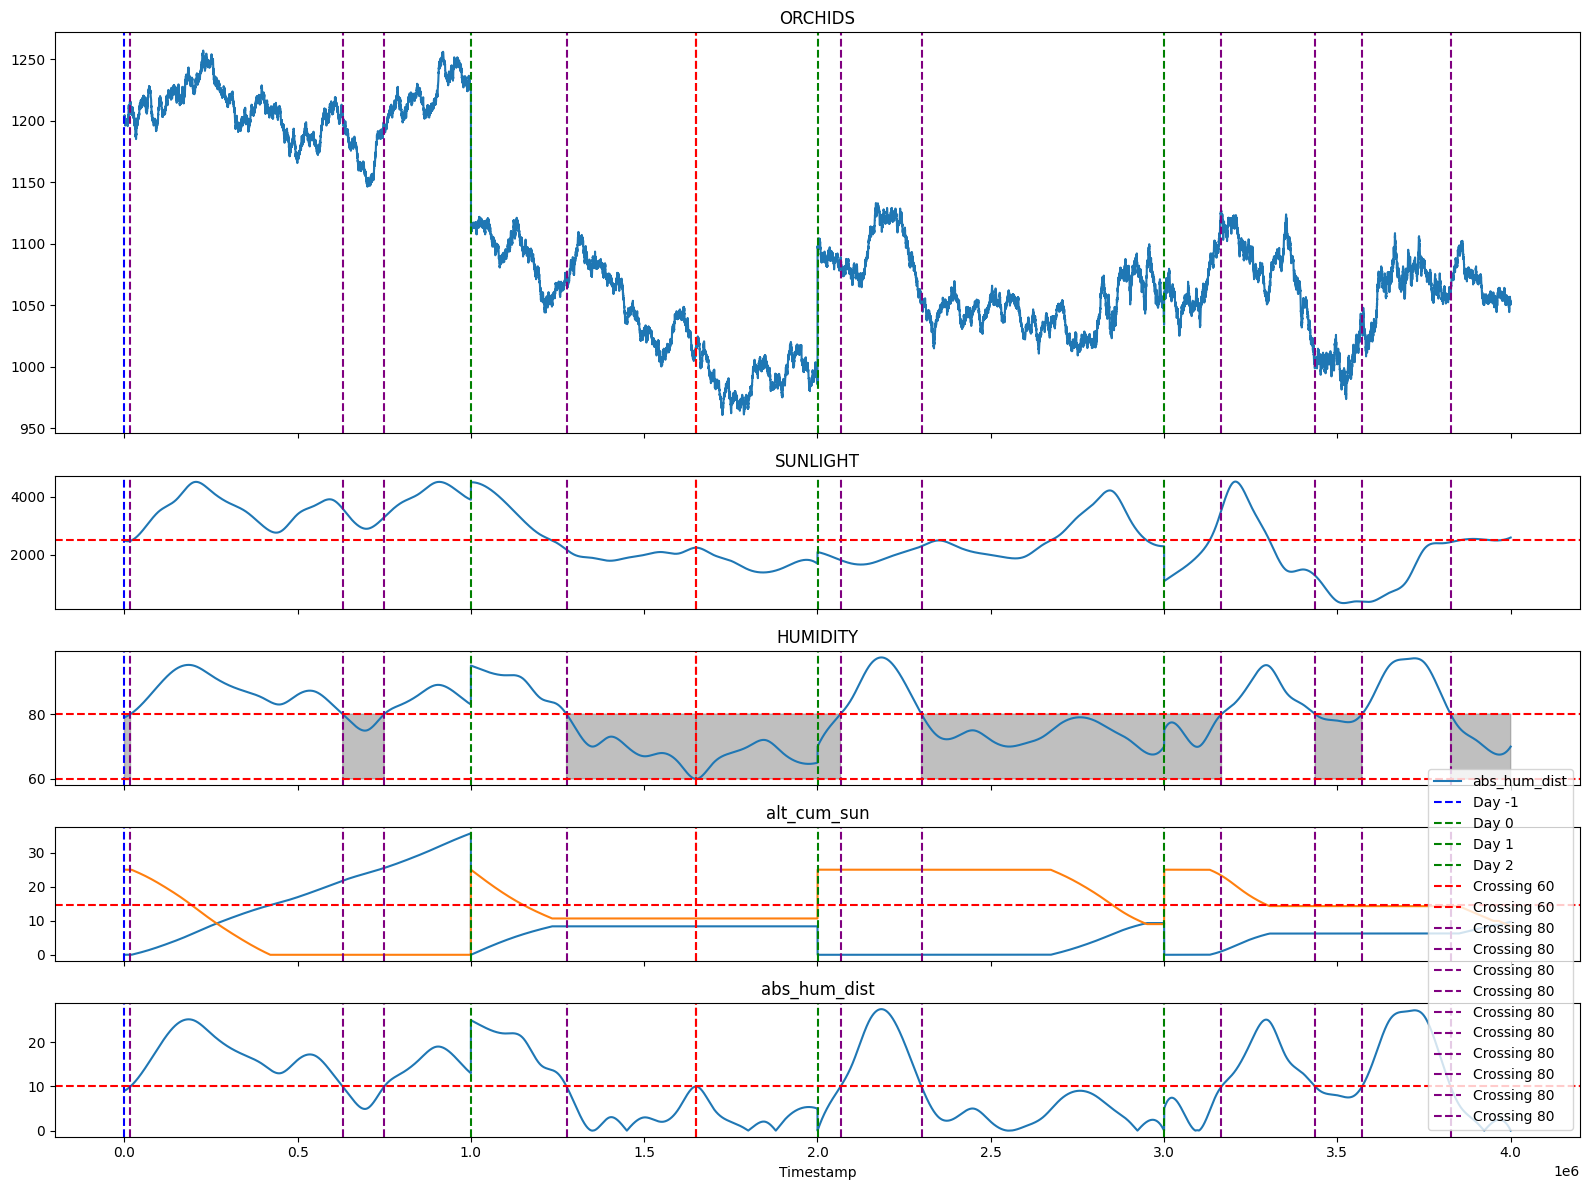

In [47]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    #axs[0].plot(df['new_timestamp'], df['orchid_roll'], label='roll', color = 'orange')
    #axs[0].plot(df['new_timestamp'], df['orchid_hull'], label='hull', color = 'red')
    #axs[0].plot(df['new_timestamp'], df['orchid_hull_ewm'], label='hull_ewm', color = 'gold')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    #axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    #axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
  
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [48]:
orchids_cleaned = orchids[(orchids['day'] <= 2) ].dropna().copy() #  & (orchids['SUNLIGHT'] < 2500)  &  (orchids['abs_hum_dist'] <= 10)

Xrf = orchids_cleaned[features_rf].copy()

z = orchids_cleaned['orchid_up_down']

label_encoder = LabelEncoder()
z_log = label_encoder.fit_transform(z)

# for ROC-AUC, too lazy to implement
'''
z_bin = label_binarize(z, classes=[-1,0,1])
zn_classes = z_bin.shape[1]

alt_bin = label_binarize(alt, classes=[-1,0,1])
altn_classes = alt_bin.shape[1]
'''

orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_sun_low,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_scale,sun_diff,alt_sun_diff,alt_sun_diff_low,alter_sun,alter_sun_low,sun_dist_,hum_dist,abs_hum_dist,alt_hum_dist,alter_hum_dist,altest_hum_dist,altest_hum_dist_80,alt_hum_h,alt_hum_m,hum_diff,abs_hum_dist_diff,abs_hum_dist_diff_diff,abs_hum_dist_diff_hl,abs_hum_dist_diff_mid,tte,sun_hum,abs_sun_hum,alt_sun_hum,hum_dist_80_diff,orchid_shift,orchid_return,orchid_up_down,orchid_swing,transport_roll,export_roll,import_roll,transport_diff,export_diff,import_diff
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.0,24.988457,0.002500,24.995714,0.004286,24.988457,-0.5740,0.0,-0.5740,0.0,0.011543,0.011543,9.008210,9.008210,0.0,0.991790,20.991790,19.008210,0.0,79.008210,0.004110,0.004110,0.000010,0.0,0.004110,99.998,225.101268,225.101268,0.0,0.078124,1213.25,11.50,1,1,1.500000,10.490050,-2.000000,0.000000,-4.962656e-03,0.000000e+00
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.0,24.982780,0.002500,24.995714,0.004286,24.982780,-0.5677,0.0,-0.5677,0.0,0.017220,0.017220,9.012340,9.012340,0.0,0.987660,20.987660,19.012340,0.0,79.012340,0.004130,0.004130,0.000020,0.0,0.004130,99.997,225.153308,225.153308,0.0,0.078521,1213.25,11.50,1,1,1.500000,10.485112,-2.000000,0.000000,-4.937904e-03,0.000000e+00
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.0,24.977166,0.002500,24.995714,0.004286,24.977166,-0.5614,0.0,-0.5614,0.0,0.022834,0.022834,9.016490,9.016490,0.0,0.983510,20.983510,19.016490,0.0,79.016490,0.004150,0.004150,0.000020,0.0,0.004150,99.996,225.206367,225.206367,0.0,0.078918,1212.25,10.50,1,1,1.500000,10.480199,-2.000000,0.000000,-4.913276e-03,0.000000e+00
5,-1,500,1200.25,1.5,9.5,-2.0,2497.1614,79.020660,500,0.0,24.971614,0.002500,24.995714,0.004286,24.971614,-0.5552,0.0,-0.5552,0.0,0.028386,0.028386,9.020660,9.020660,0.0,0.979340,20.979340,19.020660,0.0,79.020660,0.004170,0.004170,0.000020,0.0,0.004170,99.995,225.260440,225.260440,0.0,0.079316,1211.25,11.00,1,1,1.500000,10.475310,-2.000000,0.000000,-4.888771e-03,0.000000e+00
6,-1,600,1201.75,1.5,9.5,-2.0,2496.6125,79.024850,600,0.0,24.966125,0.002500,24.995714,0.004286,24.966125,-0.5489,0.0,-0.5489,0.0,0.033875,0.033875,9.024850,9.024850,0.0,0.975150,20.975150,19.024850,0.0,79.024850,0.004190,0.004190,0.000020,0.0,0.004190,99.994,225.315533,225.315533,0.0,0.079714,1211.25,9.50,1,0,1.500000,10.470445,-2.000000,0.000000,-4.864388e-03,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,2,952000,1050.25,0.8,8.0,-4.0,2499.0742,67.898770,3952300,0.0,24.990742,8.769541,9.966500,15.033500,24.990742,-0.0403,0.0,-0.0403,0.0,0.009258,0.009258,-2.101230,2.101230,0.0,7.898770,32.101230,7.898770,0.0,67.898770,-0.004825,0.004825,-0.000020,0.0,0.004825,90.480,-52.511297,52.511297,0.0,-0.038112,1052.00,1.75,1,0,0.836016,8.000000,-4.000065,-0.000181,-2.764118e-10,3.281341e-07
39524,2,952100,1049.50,0.8,8.0,-4.0,2499.0347,67.893974,3952400,0.0,24.990347,8.769541,9.966500,15.033500,24.990347,-0.0395,0.0,-0.0395,0.0,0.009653,0.009653,-2.106026,2.106026,0.0,7.893974,32.106026,7.893974,0.0,67.893974,-0.004796,0.004796,-0.000029,0.0,0.004796,90.479,-52.630321,52.630321,0.0,-0.037859,1051.00,1.50,1,0,0.835836,8.000000,-4.000065,-0.000180,-2.750333e-10,3.264976e-07
39525,2,952200,1049.50,0.8,8.0,-4.0,2498.9958,67.889200,3952500,0.0,24.989958,8.769541,9.966500,15.033500,24.989958,-0.0389,0.0,-0.0389,0.0,0.010042,0.010042,-2.110800,2.110800,0.0,7.889200,32.110800,7.889200,0.0,67.889200,-0.004774,0.004774,-0.000022,0.0,0.004774,90.478,-52.748803,52.748803,0.0,-0.037663,1051.75,2.25,1,0,0.835657,8.000000,-4.000065,-0.000179,-2.736620e-10,3.248692e-07
39526,2,952300,1048.50,0.8,8.0,-4.0,2498.9575,67.884450,3952600,0.0,24.989575,8.769541,9.966500,15.033500,24.989575,-0

In [49]:
X_train_scaled_rf = Xrf[orchids_cleaned['day'] <= 1]
X_train_scaled_log = scaler.fit_transform(X_train_scaled_rf)

X_test_scaled_rf = Xrf[(orchids_cleaned['day'] > 1) & (orchids_cleaned['orchid_return'].abs() > threshold)]
X_test_scaled_log = scaler.transform(X_test_scaled_rf)

z_train = z[orchids_cleaned['day'] <= 1]
z_test = z[(orchids_cleaned['day'] > 1) & (orchids_cleaned['orchid_return'].abs() > threshold)]

z_log_train = z_log[orchids_cleaned['day'] <= 1]
z_log_test = z_log[(orchids_cleaned['day'] > 1) & (orchids_cleaned['orchid_return'].abs() > threshold)]

In [50]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled_log)
X_test_pca = pca.transform(X_test_scaled_log)

In [51]:
%%time
# Initialize Logistic Regression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000, fit_intercept=False) # sm.MNLogit(y_log_train, X_train_scaled_rf) # LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_model.fit(X_train_scaled_rf, z_log_train) # log_model.fit(method='lbfgs', maxiter=100)

CPU times: user 1.02 s, sys: 1.54 s, total: 2.57 s
Wall time: 272 ms


LogisticRegression(fit_intercept=False, max_iter=1000)

In [52]:
%%time
alt_log = sm.Logit(z_log_train, X_train_scaled_rf)
alt_log_result = alt_log.fit(method='BFGS', maxiter=500)

Optimization terminated successfully.
         Current function value: 0.645493
         Iterations: 42
         Function evaluations: 45
         Gradient evaluations: 45
CPU times: user 1.49 s, sys: 2.56 s, total: 4.05 s
Wall time: 422 ms


In [53]:
alt_log_score = alt_log_result.predict(X_test_scaled_rf)
alt_log_pred = (alt_log_score > 0.5).astype(int)
alt_log_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28572
Model:                          Logit   Df Residuals:                    28568
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                 0.05906
Time:                        21:12:55   Log-Likelihood:                -18443.
converged:                       True   LL-Null:                       -19601.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
sun_diff               0.5600      0.018     31.563      0.000       0.525       0.595
altest_hum_dist_80    -0.0078      0.001     -8.017      0.000      -0.010      -0.006
hum_diff             144.6576      4.449     32.517      0.000     135.938     153.377
hum_dist_80_diff      -8.8556      0.326    -27.144      0.000      -9.495      -8.216
======================================================================================
"""

In [54]:
feature_names3 = X_train_scaled_rf.columns
coefficients3 = log_model.coef_[0] # log_model.params

feature_coefficients_df = pd.DataFrame({
    'Feature': feature_names3,
    'Coefficient': coefficients3
})

print(feature_coefficients_df)

              Feature  Coefficient
0            sun_diff     0.521380
1  altest_hum_dist_80    -0.008937
2            hum_diff     7.999550
3    hum_dist_80_diff     0.661546


In [55]:
log_pred = log_model.predict(X_test_scaled_rf)
log_pred_train = log_model.predict(X_train_scaled_rf)
log_score = log_model.predict_proba(X_test_scaled_rf)

In [56]:
# For Logistic Regression

accuracy_log = accuracy_score(z_log_test, log_pred)
precision_log = precision_score(z_log_test, log_pred, average='macro', zero_division=0)  # Adjust average as needed
recall_log = recall_score(z_log_test, log_pred, average='macro')  # Adjust average as needed
f1_log = f1_score(z_log_test, log_pred, average='macro')  # Adjust average as needed

accuracy_log_train = accuracy_score(z_log_train, log_pred_train)
precision_log_train = precision_score(z_log_train, log_pred_train, average='macro', zero_division=0)  # Adjust average as needed
recall_log_train = recall_score(z_log_train, log_pred_train, average='macro')  # Adjust average as needed
f1_log_train = f1_score(z_log_train, log_pred_train, average='macro')  # Adjust average as needed

print(f"Log Accuracy Train: {accuracy_log_train}")
print(f"Log Precision Train: {precision_log_train}")
print(f"Log Recall Train: {recall_log_train}")
print(f"Log F1 Score Train: {f1_log_train}")

print(f"Log Accuracy: {accuracy_log}")
print(f"Log Precision: {precision_log}")
print(f"Log Recall: {recall_log}")
print(f"Log F1 Score: {f1_log}")

# ROC-AUC?
'''
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(multi_class='ovr', solver='lbfgs')  # ovr: One-vs-Rest
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)

# Compute ROC AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

'''
# print(log_model.summary())

Log Accuracy Train: 0.6430071398572028
Log Precision Train: 0.6365408463960489
Log Recall Train: 0.63064506154953
Log F1 Score Train: 0.631211040318119
Log Accuracy: 0.6455952553160712
Log Precision: 0.6438835397705662
Log Recall: 0.643333392165119
Log F1 Score: 0.6435077464556311


'\n# Splitting the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)\n\n# Fit the model\nmodel = LogisticRegression(multi_class=\'ovr\', solver=\'lbfgs\')  # ovr: One-vs-Rest\nmodel.fit(X_train, y_train)\n\n# Predict probabilities\ny_score = model.predict_proba(X_test)\n\n# Compute ROC AUC\nfpr = dict()\ntpr = dict()\nroc_auc = dict()\n\nfor i in range(n_classes):\n    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])\n    roc_auc[i] = auc(fpr[i], tpr[i])\n\n# Plot ROC curves\nplt.figure()\ncolors = [\'aqua\', \'darkorange\', \'cornflowerblue\']\nfor i in range(n_classes):\n    plt.plot(fpr[i], tpr[i], color=colors[i],\n             label=\'ROC curve of class {0} (area = {1:0.2f})\'\n             \'\'.format(i, roc_auc[i]))\n\nplt.plot([0, 1], [0, 1], \'k--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Multi-cl

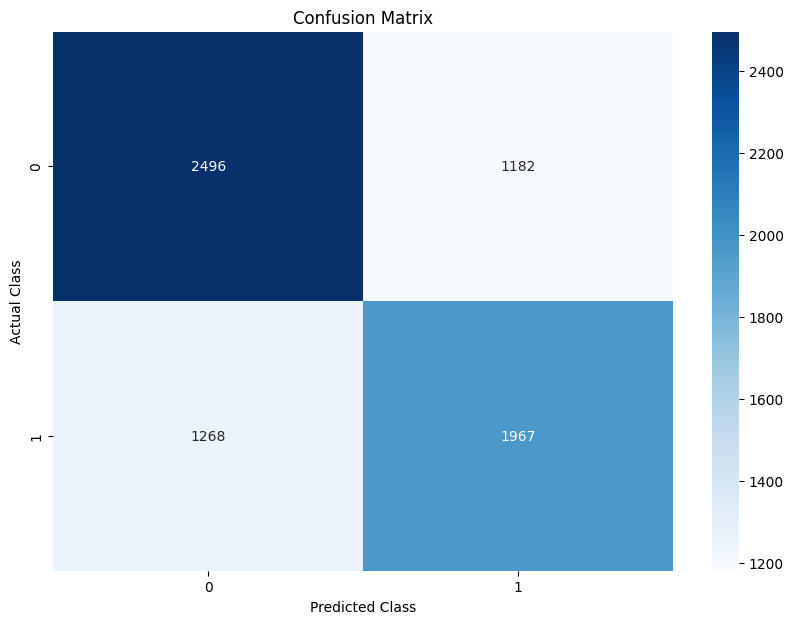

In [57]:
# sklearn - much more robust
test_test = z_log_test
conf_matrix = confusion_matrix(test_test, log_pred)
class_names = np.unique(test_test)  # Extract class names dynamically or define manually if necessary

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

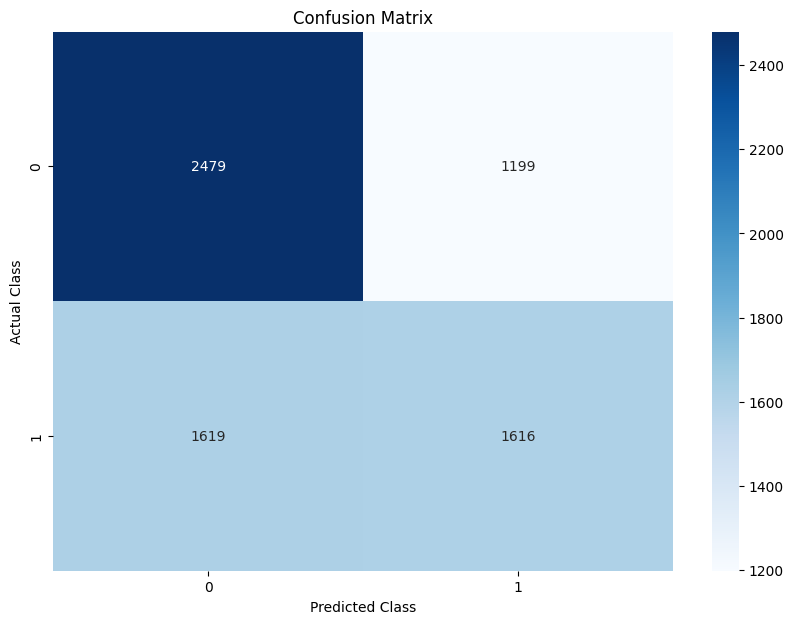

In [58]:
# sm - much less robust
test_test = z_log_test
conf_matrix = confusion_matrix(test_test, alt_log_pred)
class_names = np.unique(test_test)  # Extract class names dynamically or define manually if necessary

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# This is how to implement to get probabilities; if probability > 0.5, expect move up by lagged number of days, else expect move down

In [59]:
%%time
def apply_model(row):
    # Calculate the sum product of features and coefficients excluding 'const'
    sum_product = (row[feature_names3[feature_names3 != 'const']] * 
                   coefficients3[feature_names3 != 'const']).sum()

    # Add the constant term if 'const' is in feature_names1
    if 'const' in feature_names3:
        sum_product += coefficients3['const']

    odds = np.exp(sum_product)
    
    return odds / (1 + odds)

orchids['preds'] = orchids.apply(apply_model, axis=1)
#orchids['preds'] = np.maximum(orchids['preds'], -2)
#orchids['preds'] = np.minimum(orchids['preds'], 2)

CPU times: user 4.76 s, sys: 103 ms, total: 4.86 s
Wall time: 4.42 s


In [60]:
orchids.iloc[30005:30008] #[orchids['abs_hum_dist'] < 10]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_sun_low,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_scale,sun_diff,alt_sun_diff,alt_sun_diff_low,alter_sun,alter_sun_low,sun_dist_,hum_dist,abs_hum_dist,alt_hum_dist,alter_hum_dist,altest_hum_dist,altest_hum_dist_80,alt_hum_h,alt_hum_m,hum_diff,abs_hum_dist_diff,abs_hum_dist_diff_diff,abs_hum_dist_diff_hl,abs_hum_dist_diff_mid,tte,sun_hum,abs_sun_hum,alt_sun_hum,hum_dist_80_diff,orchid_shift,orchid_return,orchid_up_down,orchid_swing,transport_roll,export_roll,import_roll,transport_diff,export_diff,import_diff,preds
30005,2,200,1054.75,1.0,8.0,-2.0,1101.6697,75.048004,3000500,0.0,11.016697,0.0,25.0,0.0,11.016697,0.8346,0.0,0.8346,0.0,13.983303,13.983303,5.048004,5.048004,0.0,4.951996,24.951996,15.048004,0.0,75.048004,0.023934,0.023934,-0.000136,0.0,0.023934,99.998,55.612331,55.612331,0.0,0.360159,1034.75,-20.0,-1,1,1.0,8.0,-2.0,0.0,0.0,0.0,0.674888
30006,2,300,1055.25,1.0,8.0,-2.0,1102.5039,75.071810,3000600,0.0,11.025039,0.0,25.0,0.0,11.025039,0.8342,0.0,0.8342,0.0,13.974961,13.974961,5.071810,5.071810,0.0,4.928190,24.928190,15.071810,0.0,75.071810,0.023806,0.023806,-0.000128,0.0,0.023806,99.997,55.916903,55.916903,0.0,0.358800,1034.75,-20.5,-1,1,1.0,8.0,-2.0,0.0,0.0,0.0,0.674374
30007,2,400,1056.25,1.0,8.0,-2.0,1103.3376,75.095474,3000700,0.0,11.033376,0.0,25.0,0.0,11.033376,0.8337,0.0,0.8337,0.0,13.966624,13.966624,5.095474,5.095474,0.0,4.904526,24.904526,15.095474,0.0,75.095474,0.023664,0.023664,-0.000142,0.0,0.023664,99.996,56.220281,56.220281,0.0,0.357219,1035.75,-20.5,-1,1,1.0,8.0,-2.0,0.0,0.0,0.0,0.673791


In [61]:
log_score

array([[0.32511155, 0.67488845],
       [0.32562619, 0.67437381],
       [0.32620915, 0.67379085],
       ...,
       [0.56279196, 0.43720804],
       [0.56270298, 0.43729702],
       [0.56259527, 0.43740473]])

In [62]:
alt_log_score

30005    0.651031
30006    0.649465
30007    0.647867
30008    0.646346
30009    0.644809
           ...   
39239    0.343866
39352    0.342099
39353    0.342168
39354    0.342271
39355    0.342371
Length: 6913, dtype: float64

In [63]:
log_pred

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
cutoff = .7

In [65]:
orchids['pred_class'] = np.where(orchids['preds'] >= cutoff, 1, np.where(orchids['preds'] <= 1-cutoff, -1, 0))
actuals = orchids[(orchids['pred_class'] != 0) & (orchids['day'] > 1)].copy()

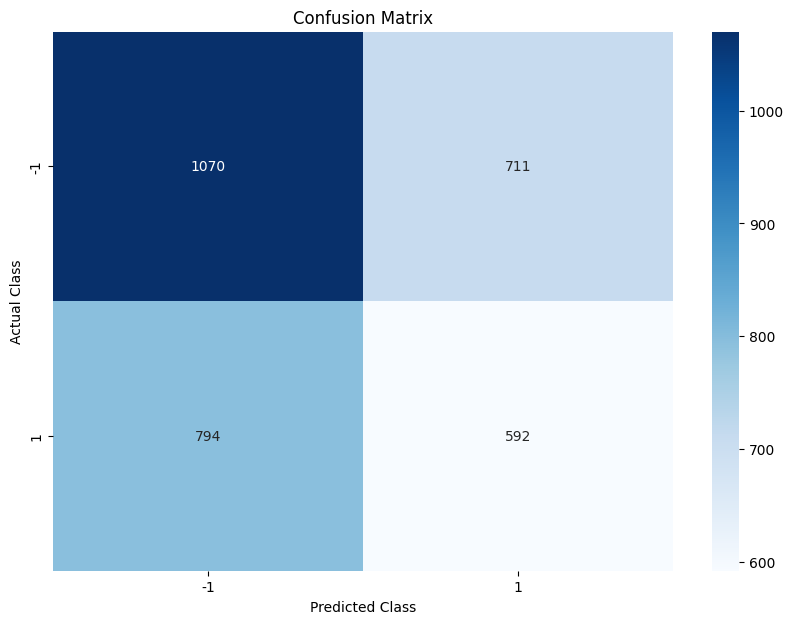

In [66]:
# sklearn - much more robust
test_test = actuals['orchid_up_down']
conf_matrix = confusion_matrix(test_test, actuals['pred_class'])
class_names = np.unique(test_test)  # Extract class names dynamically or define manually if necessary

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [67]:
actuals['orchid_return'][actuals['orchid_return'] > 0].median()

17.5

In [68]:
actuals['orchid_return'][actuals['orchid_return'] < 0].median()

-17.5

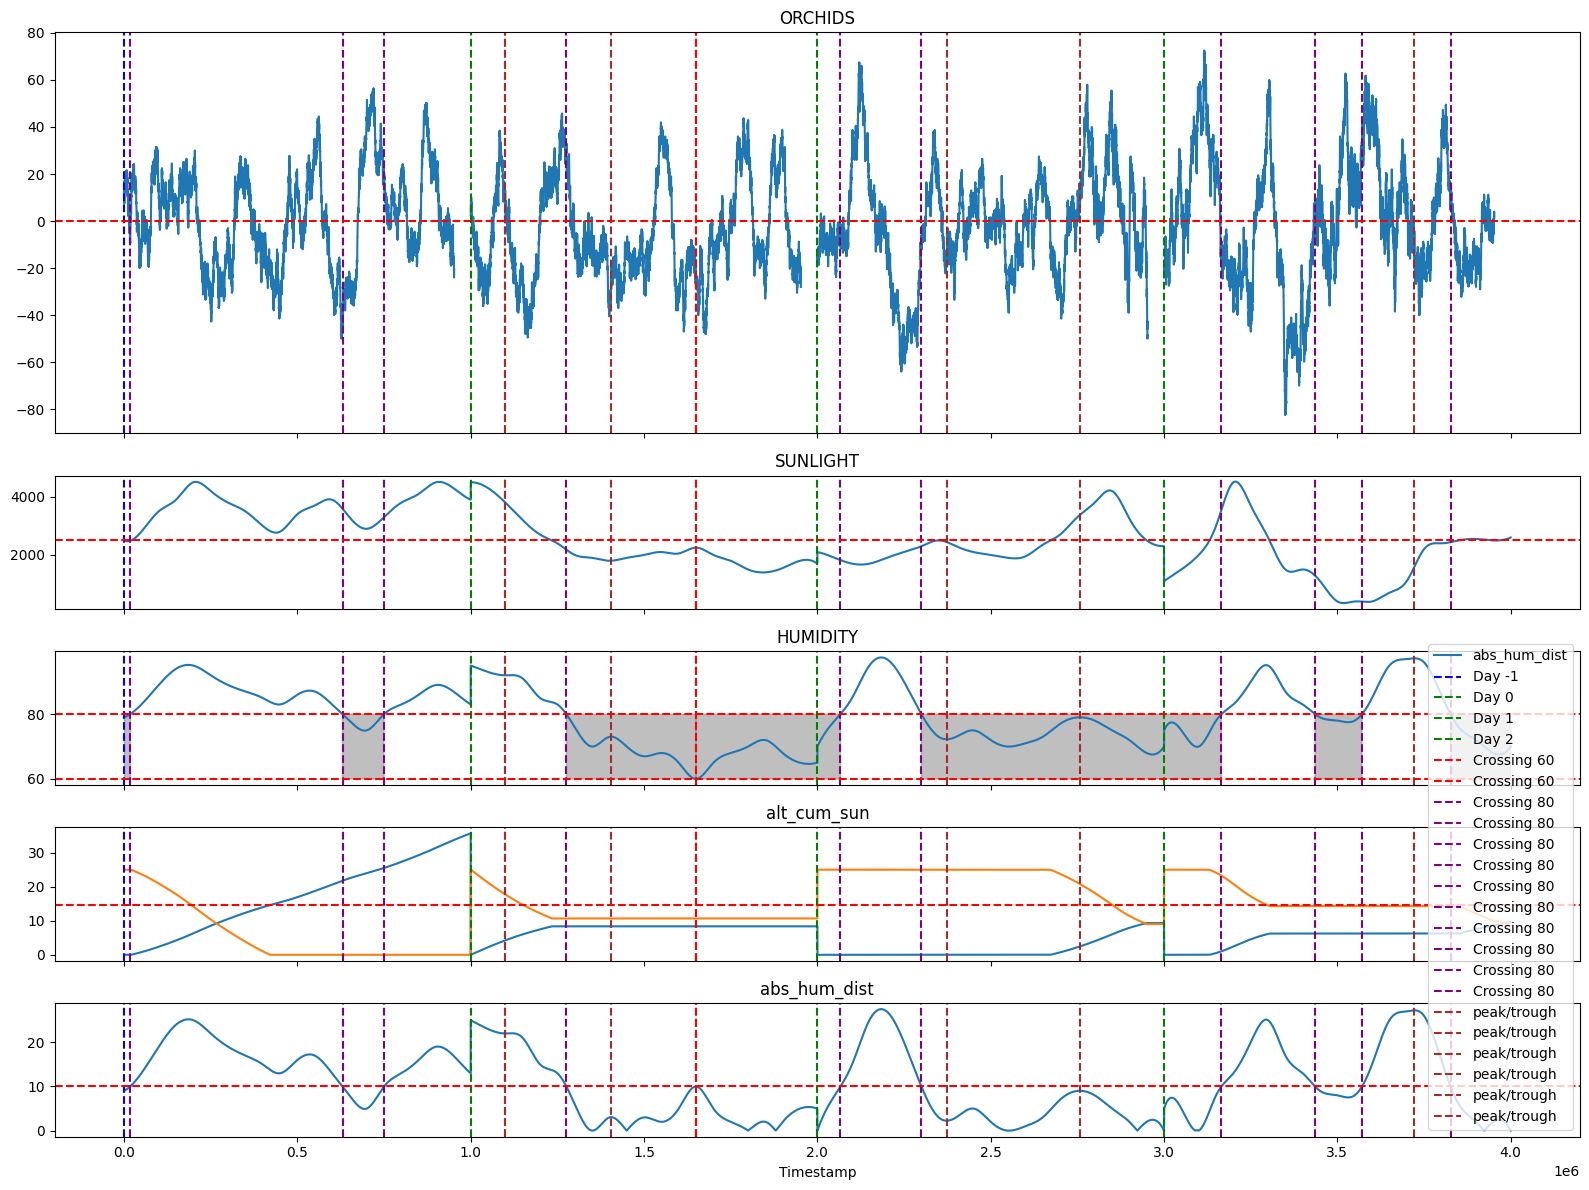

In [71]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['orchid_return'], label='ORCHIDS')
    #axs[0].plot(df['new_timestamp'], df['preds'], label='preds')
    #axs[0].plot(df['new_timestamp'], df['orchid_roll_return_shift'], label='roll_return_shift')
    #axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    #axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    #axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')

    
    peak_trough_hum = (df['abs_hum_dist_diff'] == 0)
    
    for timestamp in df.loc[peak_trough_hum, 'new_timestamp']:
        for ax in axs:
            ax.axvline(timestamp, color='brown', linestyle='--', 
                       label='peak/trough')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    
    axs[0].axhline(0, color='red', linestyle='--', label='Profit')
    '''
    axs[0].axhline(5, color='lightblue', linestyle='--', label='Profit')
    axs[0].axhline(-5, color='lightblue', linestyle='--', label='Profit')
    axs[0].axhline(10, color='lightgreen', linestyle='--', label='Profit')
    axs[0].axhline(-10, color='lightgreen', linestyle='--', label='Profit')
    axs[0].axhline(15, color='darkblue', linestyle='--', label='Profit')
    axs[0].axhline(-15, color='darkblue', linestyle='--', label='Profit')
    '''
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [73]:
heapq.nlargest(10, orchids['preds'])

[0.8802695544978376,
 0.8802665537597191,
 0.8802653324861246,
 0.8802643520463629,
 0.88026178840806,
 0.8802549368925704,
 0.8802500406835099,
 0.8802465912194692,
 0.8802454593738176,
 0.8802276449554224]

In [74]:
heapq.nsmallest(10, orchids['preds'])

[0.16528387542746703,
 0.16529236046352364,
 0.16530342537618653,
 0.1653077852015978,
 0.1653085522289689,
 0.1653134255871068,
 0.1653171960595415,
 0.16531840526541555,
 0.16532283665797828,
 0.1653248993859328]

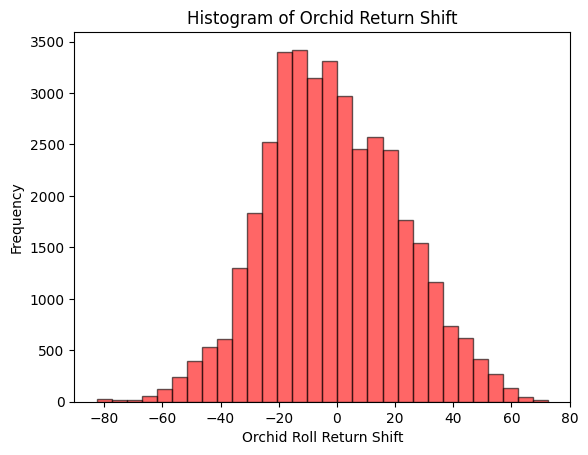

In [76]:
plt.hist(orchids['orchid_return'], bins=30, color='red', edgecolor='black', alpha=0.6)
plt.title('Histogram of Orchid Return Shift')
plt.xlabel('Orchid Roll Return Shift')
plt.ylabel('Frequency')
plt.show()